# Introduction:
### In this project, we are going to calculate the "Flow," "Density," and "Speed" for the given data. 
 First, we perform the approach for each subset. In the second part, we will consider the whole subsets from each dataset to find speed- and flow-density relations, fit the data with the triangular fundamental diagram, and estimate the corresponding parameters. 

## Step.0

### Importing the requirement packages

The following slide shows the Python packages used for this project. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats
import zipfile
from IPython.display import display
import zipfile
import matplotlib.pyplot as plt
from IPython.display import HTML
from scipy.optimize import curve_fit
from IPython.display import display, Math
cumulative_results = {}

## Step.1

#### In this step, we can choose the dataset that we want to perform the analysis for it.


##### Guidelines:
For considering the "data1.ZIP" file, please enter the "1" in the next step.


For considering the "data2.ZIP" file, please enter the "2" in the next step.

For considering the "data3.ZIP" file, please enter the "3" in the next step.

For considering the "data4.ZIP" file, please enter the "4" in the next step.

In [59]:
choice = input("Which dataset would you like to consider?\n1. data1.ZIP\n2. data2.ZIP\n3. data3.ZIP\n4. data4.ZIP\nEnter your choice (1-4): ")

if choice == '1':
    file_name = 'data1.ZIP'
elif choice == '2':
    file_name = 'data2.ZIP'
elif choice == '3':
    file_name = 'data3.ZIP'
elif choice == '4':
    file_name = 'data4.ZIP'
else:
    print("Invalid choice. Please enter a number between 1 and 4.")
    exit()

dfs = {}
with zipfile.ZipFile(file_name, 'r') as zip_file:
    file_list_1 = zip_file.namelist()
    file_list_1 = file_list_1[::-1]

    for filename in file_list_1:
        if filename.endswith('.txt'):
            with zip_file.open(filename) as file:
                df = pd.read_csv(file)
                df.columns = ['Vehicle ID', 'Frame ID', 'Distance', 'Type', 'Lane']
                dfs[filename] = df


Which dataset would you like to consider?
1. data1.ZIP
2. data2.ZIP
3. data3.ZIP
4. data4.ZIP
Enter your choice (1-4): 4


## Step.2

As part of this step, each data set is classified according to its lane type and done separately for cars and trucks. After all, each sub-dataset vehicle miles traveled (VMT) and vehicle hours traveled (VHT) are calculated.


In [60]:
VHT = {}
VMT = {}

if file_name == 'data1.zip':
    j = 15
else:
    j = 10

for i in range (len(file_list_1)):
    
    VHT_sum = {}
    VMT_sum = {}
    
    df = dfs[file_list_1[i]]
    
    df_HOV = dfs[file_list_1[i]].loc[dfs[file_list_1[i]]['Lane'] == 1]
    df_Lane2 = dfs[file_list_1[i]].loc[dfs[file_list_1[i]]['Lane'] == 2]
    df_Lane3 = dfs[file_list_1[i]].loc[dfs[file_list_1[i]]['Lane'] == 3]
    df_Lane4 = dfs[file_list_1[i]].loc[dfs[file_list_1[i]]['Lane'] == 4]
    df_Lane5 = dfs[file_list_1[i]].loc[dfs[file_list_1[i]]['Lane'] == 5]
    df_Lane6 = dfs[file_list_1[i]].loc[dfs[file_list_1[i]]['Lane'] == 6]
    
    HOV = df_HOV.groupby(['Vehicle ID', 'Type'])[['Frame ID', 'Distance']].apply(lambda x: x.max() - x.min())
    HOV.columns = ['VHT', 'VMT']
    HOV['VHT'] = HOV['VHT'] / (j * 3600)
    HOV['VMT'] = HOV['VMT'] / 5280
    
    HOV = HOV.reset_index()

    VHT_sum['HOV'] = HOV.groupby('Type')['VHT'].sum()
    VHT_sum['e_HOV'] = HOV.groupby('Type')['Vehicle ID'].count() / len(HOV)
    VMT_sum['HOV'] = HOV.groupby('Type')['VMT'].sum()
    VMT_sum['e_HOV'] = HOV.groupby('Type')['Vehicle ID'].count() / len(HOV)
    
    Lane2 = df_Lane2.groupby(['Vehicle ID', 'Type'])[['Frame ID', 'Distance']].apply(lambda x: x.max() - x.min())
    Lane2.columns = ['VHT', 'VMT']
    Lane2['VHT'] = Lane2['VHT'] / (j * 3600)
    Lane2['VMT'] = Lane2['VMT'] / 5280
    
    Lane2 = Lane2.reset_index()

    VHT_sum['Lane2'] = Lane2.groupby('Type')['VHT'].sum()
    VHT_sum['e_Lane2'] = Lane2.groupby('Type')['Vehicle ID'].count() / len(Lane2)
    VMT_sum['Lane2'] = Lane2.groupby('Type')['VMT'].sum()
    VMT_sum['e_Lane2'] = Lane2.groupby('Type')['Vehicle ID'].count() / len(Lane2)
    
    Lane3 = df_Lane3.groupby(['Vehicle ID', 'Type'])[['Frame ID', 'Distance']].apply(lambda x: x.max() - x.min())
    Lane3.columns = ['VHT', 'VMT']
    Lane3['VHT'] = Lane3['VHT'] / (j * 3600)
    Lane3['VMT'] = Lane3['VMT'] / 5280

    Lane3 = Lane3.reset_index()

    VHT_sum['Lane3'] = Lane3.groupby('Type')['VHT'].sum()
    VHT_sum['e_Lane3'] = Lane3.groupby('Type')['Vehicle ID'].count() / len(Lane3)
    VMT_sum['Lane3'] = Lane3.groupby('Type')['VMT'].sum()
    VMT_sum['e_Lane3'] = Lane3.groupby('Type')['Vehicle ID'].count() / len(Lane3)
    
    Lane4 = df_Lane4.groupby(['Vehicle ID', 'Type'])[['Frame ID', 'Distance']].apply(lambda x: x.max() - x.min())
    Lane4.columns = ['VHT', 'VMT']
    Lane4['VHT'] = Lane4['VHT'] / (j * 3600)
    Lane4['VMT'] = Lane4['VMT'] / 5280
    
    Lane4 = Lane4.reset_index()

    VHT_sum['Lane4'] = Lane4.groupby('Type')['VHT'].sum()
    VHT_sum['e_Lane4'] = Lane4.groupby('Type')['Vehicle ID'].count() / len(Lane4)
    VMT_sum['Lane4'] = Lane4.groupby('Type')['VMT'].sum()
    VMT_sum['e_Lane4'] = Lane4.groupby('Type')['Vehicle ID'].count() / len(Lane4)
    
    Lane5 = df_Lane5.groupby(['Vehicle ID', 'Type'])[['Frame ID', 'Distance']].apply(lambda x: x.max() - x.min())
    Lane5.columns = ['VHT', 'VMT']
    Lane5['VHT'] = Lane5['VHT'] / (j * 3600)
    Lane5['VMT'] = Lane5['VMT'] / 5280
    
    Lane5 = Lane5.reset_index()

    VHT_sum['Lane5'] = Lane5.groupby('Type')['VHT'].sum()
    VHT_sum['e_Lane5'] = Lane5.groupby('Type')['Vehicle ID'].count() / len(Lane5)
    VMT_sum['Lane5'] = Lane5.groupby('Type')['VMT'].sum()
    VMT_sum['e_Lane5'] = Lane5.groupby('Type')['Vehicle ID'].count() / len(Lane5)
    
    Lane6 = df_Lane6.groupby(['Vehicle ID', 'Type'])[['Frame ID', 'Distance']].apply(lambda x: x.max() - x.min())
    Lane6.columns = ['VHT', 'VMT']
    Lane6['VHT'] = Lane6['VHT'] / (j * 3600)
    Lane6['VMT'] = Lane6['VMT'] / 5280
    
    Lane6 = Lane6.reset_index()

    VHT_sum['Lane6'] = Lane6.groupby('Type')['VHT'].sum()
    VHT_sum['e_Lane6'] = Lane6.groupby('Type')['Vehicle ID'].count() / len(Lane6)
    VMT_sum['Lane6'] = Lane6.groupby('Type')['VMT'].sum()
    VMT_sum['e_Lane6'] = Lane6.groupby('Type')['Vehicle ID'].count() / len(Lane6)
    
    VHT_sum = pd.DataFrame(VHT_sum)
    VHT[file_list_1[i]] = VHT_sum
    VMT_sum = pd.DataFrame(VMT_sum)
    VMT[file_list_1[i]] = VMT_sum

VHT = pd.concat(VHT)
VMT = pd.concat(VMT)

### VHT Results for each sub-dataset corresponding with the type of vehicle are shown below: 

Note:
(Type2: cars, Type3: trucks, e: the proportion of each type of vehicle) 


In [61]:
VHT

HOV     e_HOV     Lane2   e_Lane2     Lane3   e_Lane3  \
             Type                                                               
data4_1.txt  2     0.505722  0.952381  0.649694  0.976190  0.635250  0.914634   
             3     0.029722  0.047619  0.009278  0.023810  0.058972  0.085366   
data4_2.txt  2     0.455528  0.943820  0.812389  0.979167  0.711639  0.908046   
             3     0.020333  0.056180  0.008500  0.020833  0.081389  0.091954   
data4_3.txt  2     0.402806  0.977011  0.847417  0.987342  0.739667  0.890244   
             3     0.010861  0.022989  0.000056  0.012658  0.096833  0.109756   
data4_4.txt  2     0.379444  0.964706  0.929944  1.000000  0.727917  0.941860   
             3     0.013000  0.035294       NaN       NaN  0.072806  0.058140   
data4_5.txt  2     0.402111  0.977273  0.774111  1.000000  0.676972  0.934783   
             3     0.010556  0.022727       NaN       NaN  0.060444  0.065217   
data4_6.txt  2     0.449111  0.977778  0.884306  1.000000  0.709611  0.933333   
             3     0.010556  0.022222       NaN       NaN  0.044194  0.066667   
data4_7.txt  2     0.515361  0.988764  1.004083  1.000000  0.828111  0.950617   
             3     0.002722  0.011236       NaN       NaN  0.055111  0.049383   
data4_8.txt  2     0.508472  0.988372  1.168444  1.000000  0.859194  0.907692   
             3     0.005500  0.011628       NaN       NaN  0.100194  0.092308   
data4_9.txt  2     0.444972  0.976744  1.074361  1.000000  0.878194  0.887097   
             3     0.009889  0.023256       NaN       NaN  0.122083  0.112903   
data4_10.txt 2     0.359889  0.975000  1.109889  1.000000  0.865306  0.875000   
             3     0.009889  0.025000       NaN       NaN  0.128972  0.125000   
data4_11.txt 2     0.345028  0.962500  1.056472  1.000000  0.854306  0.870968   
             3     0.015361  0.037500       NaN       NaN  0.116861  0.129032   
data4_12.txt 2     0.389833  0.963415  1.180278  1.000000  0.875056  0.905660   
             3     0.016972  0.036585       NaN       NaN  0.134111  0.094340   
data4_13.txt 2     0.416222  0.951220  1.104417  1.000000  0.802667  0.900000   
             3     0.022778  0.048780       NaN       NaN  0.120972  0.100000   

                      Lane4   e_Lane4     Lane5   e_Lane5     Lane6   e_Lane6  
             Type                                                              
data4_1.txt  2     0.802833  0.977528  0.689694  0.967742  0.856667  0.981651  
             3     0.006500  0.022472  0.014361  0.032258  0.000278  0.018349  
data4_2.txt  2     0.841500  0.980198  0.731417  0.961165  0.924389  0.982456  
             3     0.021194  0.019802  0.036028  0.038835  0.001972  0.017544  
data4_3.txt  2     0.802111  0.978723  0.689472  0.951456  0.930722  0.982301  
             3     0.021194  0.021277  0.044528  0.048544  0.001972  0.017699  
data4_4.txt  2     0.814278  0.989796  0.701167  0.972973  0.870333  0.990991  
             3     0.014694  0.010204  0.030833  0.027027  0.001694  0.009009  
data4_5.txt  2     0.740083  1.000000  0.655722  0.982143  0.771417  1.000000  
             3          NaN       NaN  0.009167  0.017857       NaN       NaN  
data4_6.txt  2     0.799056  0.990826  0.760917  0.981651  0.877444  1.000000  
             3     0.016194  0.009174  0.009667  0.018349       NaN       NaN  
data4_7.txt  2     0.960861  0.988636  0.954417  0.988095  0.995389  1.000000  
             3     0.026778  0.011364  0.025667  0.011905       NaN       NaN  
data4_8.txt  2     1.162528  0.985294  1.119500  0.965517  1.069000  1.000000  
             3     0.026778  0.014706  0.049083  0.034483       NaN       NaN  
data4_9.txt  2     1.220472  0.985294  1.066417  0.952381  0.941250  1.000000  
             3     0.010583  0.014706  0.068111  0.047619       NaN       NaN  
data4_10.txt 2     1.174389  0.986667  1.023417  0.960526  0.931250  1.000000  
             3     0.000222  0.013333  0.067861  0.039474       NaN       N

### VMT Results for each sub-dataset corresponding with the type of vehicle are shown below: 

In [62]:
VMT

HOV     e_HOV      Lane2   e_Lane2     Lane3  \
             Type                                                       
data4_1.txt  2     12.537854  0.952381  10.660457  0.976190  8.450675   
             3      0.678095  0.047619   0.170719  0.023810  0.811753   
data4_2.txt  2     12.437342  0.943820  10.607395  0.979167  8.092168   
             3      0.544253  0.056180   0.159692  0.020833  0.969744   
data4_3.txt  2     12.369969  0.977011   9.814539  0.987342  7.929443   
             3      0.305149  0.022989   0.000639  0.012658  1.136548   
data4_4.txt  2     12.364255  0.964706  10.196607  1.000000  8.070037   
             3      0.414958  0.035294        NaN       NaN  0.823833   
data4_5.txt  2     12.688913  0.977273  11.847347  1.000000  9.385188   
             3      0.339066  0.022727        NaN       NaN  0.807814   
data4_6.txt  2     12.841836  0.977778  10.983527  1.000000  9.609878   
             3      0.339066  0.022222        NaN       NaN  0.617487   
data4_7.txt  2     13.359855  0.988764   9.294405  1.000000  8.308652   
             3      0.093617  0.011236        NaN       NaN  0.503227   
data4_8.txt  2     12.789995  0.988372   7.299215  1.000000  6.468645   
             3      0.169848  0.011628        NaN       NaN  0.700895   
data4_9.txt  2     12.347349  0.976744   8.097599  1.000000  5.874073   
             3      0.339780  0.023256        NaN       NaN  0.882859   
data4_10.txt 2     11.425304  0.975000   7.729116  1.000000  5.447907   
             3      0.339780  0.025000        NaN       NaN  0.905809   
data4_11.txt 2     11.487773  0.962500   8.506036  1.000000  5.211818   
             3      0.509730  0.037500        NaN       NaN  0.775937   
data4_12.txt 2     11.878098  0.963415   6.827916  1.000000  3.814661   
             3      0.508947  0.036585        NaN       NaN  0.620783   
data4_13.txt 2     12.169484  0.951220   7.223558  1.000000  4.494768   
             3      0.679299  0.048780        NaN       NaN  0.632637   

                    e_Lane3      Lane4   e_Lane4      Lane5   e_Lane5  \
             Type                                                       
data4_1.txt  2     0.914634  10.321636  0.977528  10.556086  0.967742   
             3     0.085366   0.073913  0.022472   0.211902  0.032258   
data4_2.txt  2     0.908046   9.758308  0.980198  10.775000  0.961165   
             3     0.091954   0.183769  0.019802   0.524664  0.038835   
data4_3.txt  2     0.890244   9.773220  0.978723  10.452511  0.951456   
             3     0.109756   0.183769  0.021277   0.692889  0.048544   
data4_4.txt  2     0.941860  10.859359  0.989796  11.847074  0.972973   
             3     0.058140   0.109856  0.010204   0.495628  0.027027   
data4_5.txt  2     0.934783  12.551718  1.000000  12.366998  0.982143   
             3     0.065217        NaN       NaN   0.182867  0.017857   
data4_6.txt  2     0.933333  11.484214  0.990826  11.304766  0.981651   
             3     0.066667   0.144897  0.009174   0.094001  0.018349   
data4_7.txt  2     0.950617   8.575135  0.988636   7.921635  0.988095   
             3     0.049383   0.170181  0.011364   0.138905  0.011905   
data4_8.txt  2     0.907692   6.306554  0.985294   5.644987  0.965517   
             3     0.092308   0.170181  0.014706   0.234572  0.034483   
data4_9.txt  2     0.887097   6.359242  0.985294   5.176018  0.952381   
             3     0.112903   0.025284  0.014706   0.373592  0.047619   
data4_10.txt 2     0.875000   6.722993  0.986667   5.311585  0.960526   
             3     0.125000   0.001331  0.013333   0.354242  0.039474   
data4_11.txt 2     0.870968   6.831645  0.972222   6.375269  0.972973   
             3     0.129032   0.077874  0.027778   0.258575  0.027027   
data4_12.txt 2     0.905660   5.606384  0.968254   7.394252  0.987179   
             3     0.094340   0.147776  0.031746   0.040195  0.012821   
data4_13.txt 2     0.900000   6.017034  0.967213   8.376110  0.987805   
         

## Step.3

In this part, we apply the multi-commodity concept to find the VMT and VHT for each lane regardless of the type of vehicle.

In [63]:
VHT['HOV']  = VHT['HOV'] * VHT['e_HOV']
VHT = VHT.drop('e_HOV', axis=1)

VHT['Lane2']  = VHT['Lane2'] * VHT['e_Lane2']
VHT = VHT.drop('e_Lane2', axis=1)

VHT['Lane3']  = VHT['Lane3'] * VHT['e_Lane3']
VHT = VHT.drop('e_Lane3', axis=1)

VHT['Lane4']  = VHT['Lane4'] * VHT['e_Lane4']
VHT = VHT.drop('e_Lane4', axis=1)

VHT['Lane5']  = VHT['Lane5'] * VHT['e_Lane5']
VHT = VHT.drop('e_Lane5', axis=1)

VHT['Lane6']  = VHT['Lane6'] * VHT['e_Lane6']
VHT = VHT.drop('e_Lane6', axis=1)

######################

VMT['HOV'] = VMT['HOV'] * VMT['e_HOV']
VMT = VMT.drop('e_HOV', axis=1)

VMT['Lane2'] = VMT['Lane2'] * VMT['e_Lane2']
VMT = VMT.drop('e_Lane2', axis=1)

VMT['Lane3'] = VMT['Lane3'] * VMT['e_Lane3']
VMT = VMT.drop('e_Lane3', axis=1)

VMT['Lane4'] = VMT['Lane4'] * VMT['e_Lane4']
VMT = VMT.drop('e_Lane4', axis=1)

VMT['Lane5'] = VMT['Lane5'] * VMT['e_Lane5']
VMT = VMT.drop('e_Lane5', axis=1)

VMT['Lane6'] = VMT['Lane6'] * VMT['e_Lane6']
VMT = VMT.drop('e_Lane6', axis=1)


In [64]:
VHT = VHT.groupby(level=0).sum()
VMT = VMT.groupby(level=0).sum()

In [65]:
VHT

,HOV,Lane2,Lane3,Lane4,Lane5,Lane6
data4_1.txt,0.483056,0.634446,0.586056,0.784938,0.667909,0.840953
data4_10.txt,0.351139,1.109889,0.773264,1.158733,0.985697,0.931250
data4_11.txt,0.332665,1.056472,0.759151,1.095076,0.948580,0.882392
data4_12.txt,0.376192,1.180278,0.805155,1.137659,0.976915,0.859101
data4_13.txt,0.397030,1.104417,0.734497,1.077571,0.898865,0.764472
data4_2.txt,0.431079,0.795641,0.653685,0.825256,0.704411,0.908206
data4_3.txt,0.393795,0.836691,0.669112,0.785496,0.658164,0.914284
data4_4.txt,0.366511,0.929944,0.689829,0.806119,0.683050,0.862508
data4_5.txt,0.393212,0.774111,0.636764,0.740083,0.644177,0.771417
data4_6.txt,0.439365,0.884306,0.665250,0.791873,0.747132,0.877444


In [66]:
VMT

,HOV,Lane2,Lane3,Lane4,Lane5,Lane6
data4_1.txt,11.973104,10.410701,7.798572,10.091350,10.222403,12.572739
data4_10.txt,11.148166,7.729116,4.880145,6.633370,5.115901,10.836306
data4_11.txt,11.076096,8.506036,4.639446,6.644041,6.209953,11.010254
data4_12.txt,11.462153,6.827916,3.513352,5.433095,7.299969,10.414072
data4_13.txt,11.608987,7.223558,4.108555,5.825853,8.275176,10.502594
data4_2.txt,11.769191,10.389735,7.437232,9.568713,10.376929,12.195709
data4_3.txt,12.092617,9.690313,7.183882,9.569189,9.978743,12.603378
data4_4.txt,11.942515,10.196607,7.648746,10.749670,11.540278,13.010684
data4_5.txt,12.408235,11.847347,8.825794,12.551718,12.149424,14.641794
data4_6.txt,12.563997,10.983527,9.010385,11.380184,11.099064,12.927521


## Step.4

In this step, the average of regular and all lanes are used to find the VHT (or VMT) of regular and all lanes, respectively.

In [67]:
VHT['Regular Lanes']  = (VHT['Lane2'] + VHT['Lane3'] + VHT['Lane4'] + VHT['Lane5'] + VHT['Lane6'])/5
VHT['All Lanes']  = (VHT['HOV'] + VHT['Lane2'] + VHT['Lane3'] + VHT['Lane4'] + VHT['Lane5'] + VHT['Lane6'])/6

VMT['Regular Lanes'] = (VMT['Lane2'] + VMT['Lane3'] + VMT['Lane4'] + VMT['Lane5'] + VMT['Lane6'])/5
VMT['All Lanes'] = (VMT['HOV'] + VMT['Lane2'] + VMT['Lane3'] + VMT['Lane4'] + VMT['Lane5'] + VMT['Lane6'])/6

In [68]:
VHT

,HOV,Lane2,Lane3,Lane4,Lane5,Lane6,Regular Lanes,All Lanes
data4_1.txt,0.483056,0.634446,0.586056,0.784938,0.667909,0.840953,0.702861,0.666226
data4_10.txt,0.351139,1.109889,0.773264,1.158733,0.985697,0.931250,0.991767,0.884995
data4_11.txt,0.332665,1.056472,0.759151,1.095076,0.948580,0.882392,0.948334,0.845723
data4_12.txt,0.376192,1.180278,0.805155,1.137659,0.976915,0.859101,0.991822,0.889217
data4_13.txt,0.397030,1.104417,0.734497,1.077571,0.898865,0.764472,0.915964,0.829475
data4_2.txt,0.431079,0.795641,0.653685,0.825256,0.704411,0.908206,0.777440,0.719713
data4_3.txt,0.393795,0.836691,0.669112,0.785496,0.658164,0.914284,0.772749,0.709590
data4_4.txt,0.366511,0.929944,0.689829,0.806119,0.683050,0.862508,0.794290,0.722993
data4_5.txt,0.393212,0.774111,0.636764,0.740083,0.644177,0.771417,0.713310,0.659961
data4_6.txt,0.439365,0.884306,0.665250,0.791873,0.747132,0.877444,0.793201,0.734229


In [69]:
VMT

,HOV,Lane2,Lane3,Lane4,Lane5,Lane6,Regular Lanes,All Lanes
data4_1.txt,11.973104,10.410701,7.798572,10.091350,10.222403,12.572739,10.219153,10.511478
data4_10.txt,11.148166,7.729116,4.880145,6.633370,5.115901,10.836306,7.038968,7.723834
data4_11.txt,11.076096,8.506036,4.639446,6.644041,6.209953,11.010254,7.401946,8.014304
data4_12.txt,11.462153,6.827916,3.513352,5.433095,7.299969,10.414072,6.697681,7.491760
data4_13.txt,11.608987,7.223558,4.108555,5.825853,8.275176,10.502594,7.187147,7.924121
data4_2.txt,11.769191,10.389735,7.437232,9.568713,10.376929,12.195709,9.993663,10.289585
data4_3.txt,12.092617,9.690313,7.183882,9.569189,9.978743,12.603378,9.805101,10.186353
data4_4.txt,11.942515,10.196607,7.648746,10.749670,11.540278,13.010684,10.629197,10.848083
data4_5.txt,12.408235,11.847347,8.825794,12.551718,12.149424,14.641794,12.003215,12.070719
data4_6.txt,12.563997,10.983527,9.010385,11.380184,11.099064,12.927521,11.080136,11.327446


## Step.5

Finally,  the density, flow, and speed are calculated for each sub-dataset based on the following formula:

Density:
$$\kappa = \frac{VHT}{E \cdot L}$$

Flow:
$$q = \frac{VMT}{E \cdot L}$$

Speed:
$$v = \frac{VMT}{VHT}$$

$E = 3 mins $

$L = 900 ft$

In [70]:
E = 3/60
L = 900/5280

k = 0 
k = VHT/(E*L)
k

q = 0 
q = VMT/(E*L)

v = 0
v = VMT/VHT

## Step.6 

For the first part of the project, the results for k, q, and v are shown in the following slides:


In [71]:
k

,HOV,Lane2,Lane3,Lane4,Lane5,Lane6,Regular Lanes,All Lanes
data4_1.txt,56.678519,74.441714,68.763852,92.099416,78.368048,98.671831,82.468972,78.170563
data4_10.txt,41.200296,130.226963,90.729630,135.958044,115.655158,109.266667,116.367292,103.839460
data4_11.txt,39.032726,123.959407,89.073768,128.488872,111.300004,103.533938,111.271198,99.231453
data4_12.txt,44.139870,138.485926,94.471536,133.485343,114.624680,100.801238,116.373745,104.334765
data4_13.txt,46.584831,129.584889,86.181007,126.434948,105.466808,89.698074,107.473145,97.325093
data4_2.txt,50.579895,93.355235,76.699024,96.830076,82.650923,106.562854,91.219622,84.446334
data4_3.txt,46.205320,98.171694,78.509117,92.164848,77.224604,107.276009,90.669254,83.258599
data4_4.txt,43.003970,109.113481,80.939914,94.584602,80.144480,101.200910,93.196678,84.831226
data4_5.txt,46.136889,90.829037,74.713630,86.836444,75.583386,90.512889,83.695077,77.435379
data4_6.txt,51.552211,103.758519,78.056000,92.913139,87.663519,102.953481,93.068932,86.149478


In [72]:
q

,HOV,Lane2,Lane3,Lane4,Lane5,Lane6,Regular Lanes,All Lanes
data4_1.txt,1404.844174,1221.522290,915.032394,1184.051720,1199.428577,1475.201384,1199.047273,1233.346757
data4_10.txt,1308.051464,906.882978,572.603669,778.315468,600.265674,1271.459933,825.905544,906.263198
data4_11.txt,1299.595278,998.041533,544.361670,779.567442,728.634515,1291.869753,868.494983,940.345032
data4_12.txt,1344.892618,801.142200,412.233286,637.483182,856.529709,1221.917752,785.861226,879.033125
data4_13.txt,1362.121150,847.564178,482.070444,683.566809,970.954028,1232.304326,843.291957,929.763489
data4_2.txt,1380.918449,1219.062192,872.635236,1122.728985,1217.559612,1430.963184,1172.589842,1207.311276
data4_3.txt,1418.867012,1136.996680,842.908763,1122.784801,1170.839168,1478.796301,1150.465143,1195.198788
data4_4.txt,1401.255119,1196.401867,897.452867,1261.294625,1354.059289,1526.586931,1247.159116,1272.841783
data4_5.txt,1455.899585,1390.088756,1035.559802,1472.734867,1425.532412,1717.970467,1408.377260,1416.297648
data4_6.txt,1474.175651,1288.733844,1057.218517,1335.274918,1302.290175,1516.829133,1300.069317,1329.087040


In [73]:
v

,HOV,Lane2,Lane3,Lane4,Lane5,Lane6,Regular Lanes,All Lanes
data4_1.txt,24.786184,16.409110,13.306881,12.856235,15.305072,14.950583,14.539375,15.777637
data4_10.txt,31.748594,6.963865,6.311099,5.724674,5.190133,11.636302,7.097403,8.727542
data4_11.txt,33.295017,8.051358,6.111358,6.067198,6.546581,12.477742,7.805209,9.476280
data4_12.txt,30.468885,5.785008,4.363571,4.775679,7.472472,12.122051,6.752908,8.425122
data4_13.txt,29.239585,6.540610,5.593697,5.406470,9.206252,13.738359,7.846536,9.553173
data4_2.txt,27.301726,13.058316,11.377397,11.594837,14.731349,13.428349,12.854579,14.296787
data4_3.txt,30.707871,11.581716,10.736444,12.182354,15.161478,13.784968,12.688592,14.355259
data4_4.txt,32.584320,10.964748,11.087890,13.335095,16.895228,15.084715,13.382013,15.004402
data4_5.txt,31.556085,15.304453,13.860387,16.959871,18.860394,18.980396,16.827480,18.290059
data4_6.txt,28.595780,12.420511,13.544359,14.371217,14.855554,14.733150,13.968886,15.427685


## Step.7

For the second part of the project, all lanes data of whole sub-datasets is considered to find its fundamental diagram.

In [74]:
cols1 = k[['All Lanes']]
cols2 = q[['All Lanes']]
cols3 = v[['All Lanes']]

results = pd.concat([cols1, cols2, cols3], axis=1, ignore_index=False)
results.columns = ['k', 'q', 'v']
HTML(results.to_html(classes = 'table table-striped table-hover'))

,k,q,v
data4_1.txt,78.170563,1233.346757,15.777637
data4_10.txt,103.839460,906.263198,8.727542
data4_11.txt,99.231453,940.345032,9.476280
data4_12.txt,104.334765,879.033125,8.425122
data4_13.txt,97.325093,929.763489,9.553173
data4_2.txt,84.446334,1207.311276,14.296787
data4_3.txt,83.258599,1195.198788,14.355259
data4_4.txt,84.831226,1272.841783,15.004402
data4_5.txt,77.435379,1416.297648,18.290059
data4_6.txt,86.149478,1329.087040,15.427685


The In the following two slides, a fitted line for flow density, and speed density from each dataset are shown, respectively:

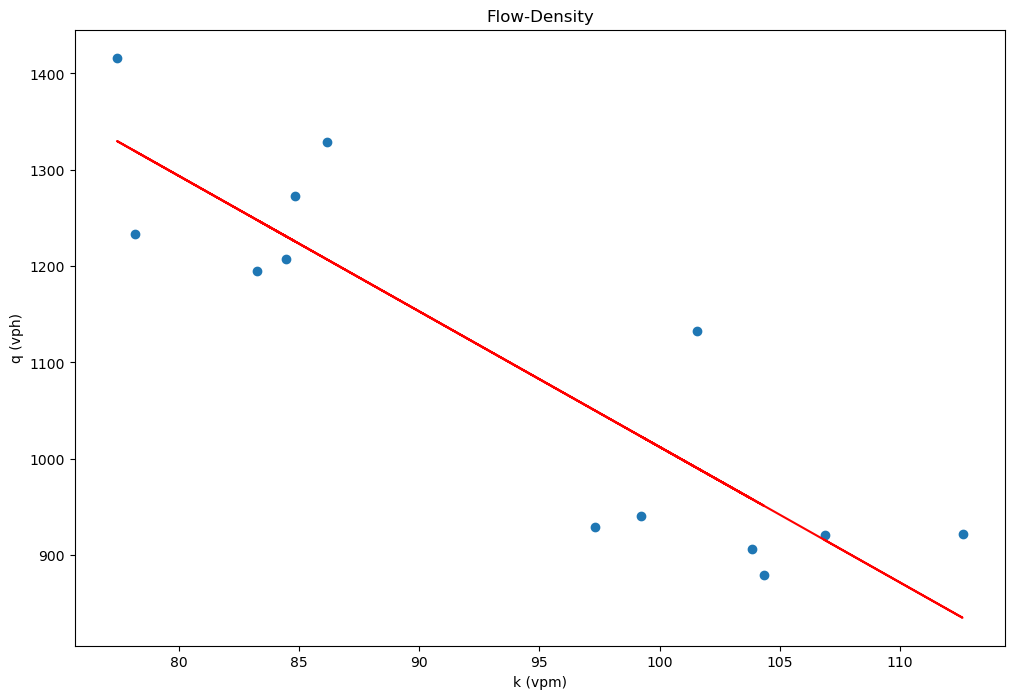

In [75]:
slope, intercept, r_value, p_value, std_err = linregress(results['k'], results['q'])
line = slope * results['k'] + intercept

plt.rcParams["figure.figsize"] = (12, 8)

plt.scatter(results['k'], results['q'])
plt.plot(results['k'], line, color='red')

plt.title('Flow-Density')
plt.xlabel('k (vpm)')
plt.ylabel('q (vph)')

plt.show()

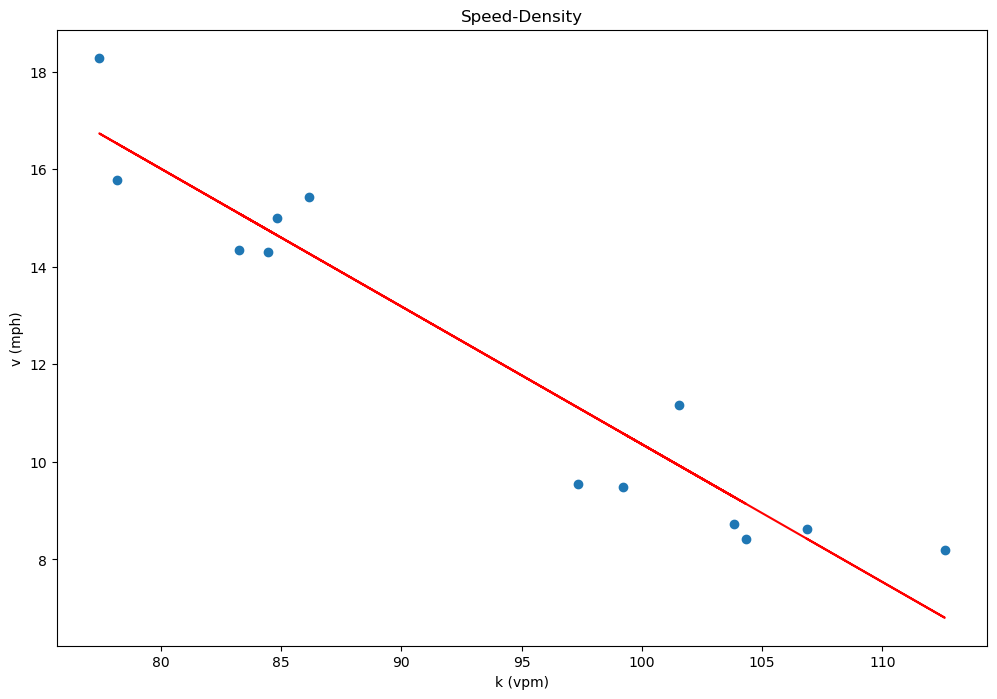

In [76]:
slope, intercept, r_value, p_value, std_err = linregress(results['k'], results['v'])
line = slope * results['k'] + intercept

plt.rcParams["figure.figsize"] = (12, 8)

plt.scatter(results['k'], results['v'])
plt.plot(results['k'], line, color='red')

plt.title('Speed-Density')
plt.xlabel('k (vpm)')
plt.ylabel('v (mph)')

plt.show()

In [77]:
cumulative_results[file_name] = results

# Note.1:
#### In order to see a similar analysis for each dataset, Please go back and run the code from step.1 for each of the four datasets and then continue!

# Note.2:
Please ensure to run the whole code for all datasets (datasets #1 to dataset #4). If not, the prepared "Final_Results.xlsx" excel file is also attached to this project and can be used as follows:

In [78]:
cumulative_results = pd.concat([cumulative_results['data1.ZIP'], cumulative_results['data2.ZIP'],
                                cumulative_results['data3.ZIP'], cumulative_results['data4.ZIP']], ignore_index=True)

# cumulative_results.to_excel("Final_Results.xlsx") 

In [79]:
cumulative_results = pd.read_excel('Final_Results.xlsx')

## Step.8

Based on the observation of the whole data, we can see that these data are captured under the over-congested situation, So:

We consider all sub-datasets to find the fundamental diagram, which is shown as follows:

### Flow-density Diagram:

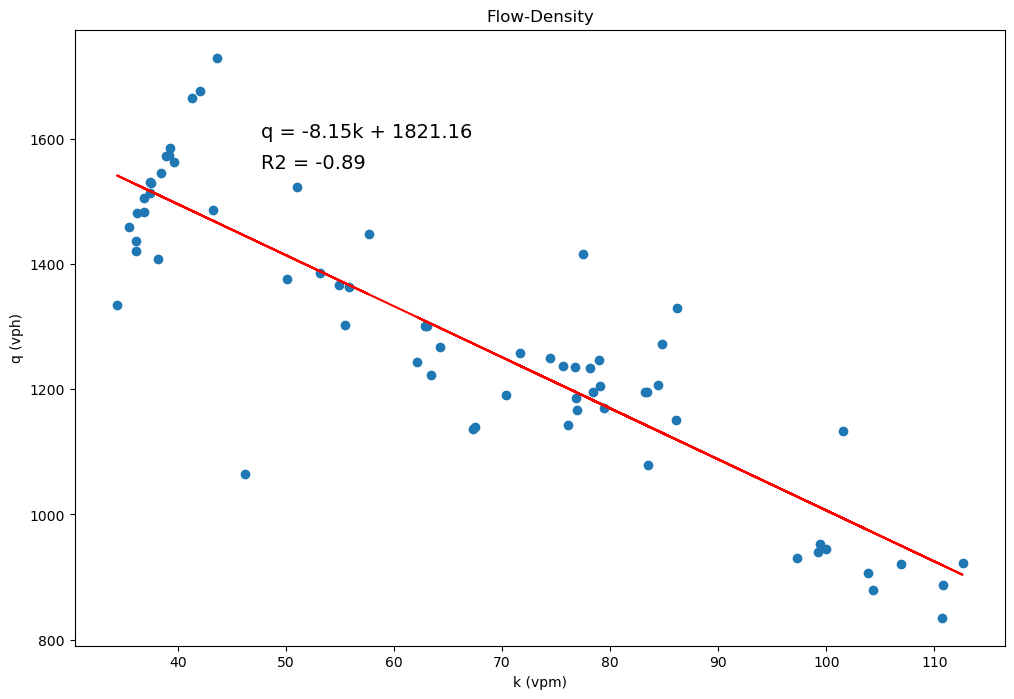

In [80]:
slope, intercept, r_value, p_value, std_err = linregress(cumulative_results['k'], cumulative_results['q'])
line = slope * cumulative_results['k'] + intercept

plt.scatter(cumulative_results['k'], cumulative_results['q'])
plt.plot(cumulative_results['k'], line, color='red')

flow_density_equation = f"q = {slope:.2f}k + {intercept:.2f}"
r_value_text = f"R2 = {r_value:.2f}"
plt.text(0.2, 0.85, flow_density_equation, transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')
plt.text(0.2, 0.8, r_value_text, transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')

plt.title('Flow-Density')
plt.xlabel('k (vpm)')
plt.ylabel('q (vph)')

plt.show()

### Speed-density Diagram:

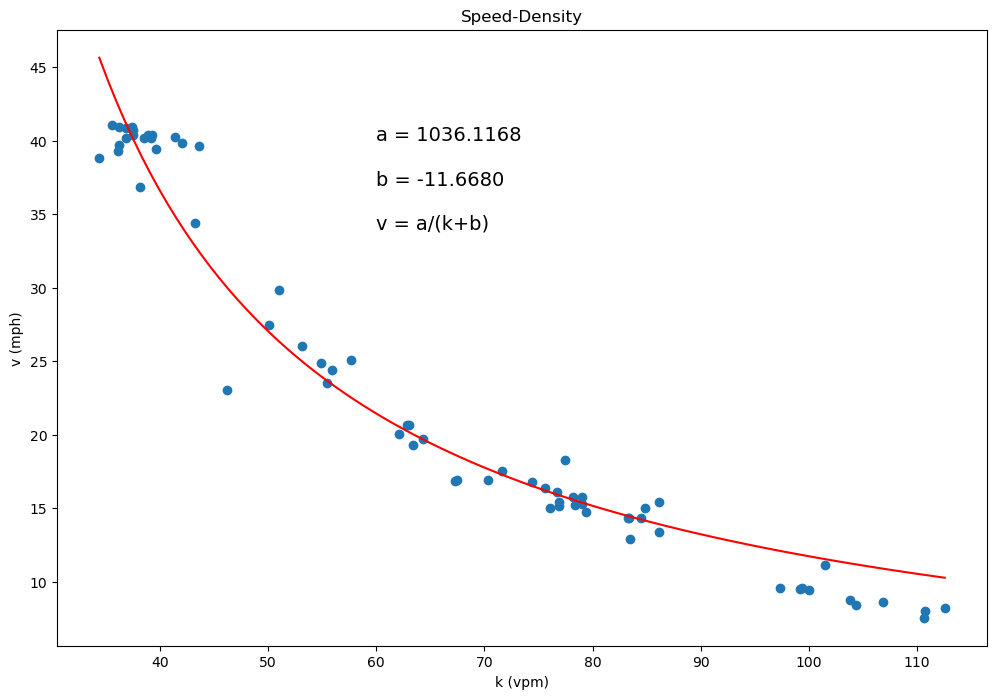

In [81]:
def reciprocal(k, a, b):
    return a / (k + b)

popt, pcov = curve_fit(reciprocal, cumulative_results['k'], cumulative_results['v'])

xfit = np.linspace(cumulative_results['k'].min(), cumulative_results['k'].max(), 100)
yfit = reciprocal(xfit, *popt)

plt.scatter(cumulative_results['k'], cumulative_results['v'])
plt.plot(xfit, yfit, color='red')

plt.text(60, 40, 'a = {:.4f}'.format(popt[0]), fontsize=14)
plt.text(60, 37, 'b = {:.4f}'.format(popt[1]), fontsize=14)
plt.text(60, 34, 'v = a/(k+b)', fontsize=14)

plt.title('Speed-Density')
plt.xlabel('k (vpm)')
plt.ylabel('v (mph)')

plt.show()

## Step.10

In conclusion:
    
###### Free-flow Speed: 40 mph
###### Critical density: 40 vpm
###### Jam density: 224 vpm
###### Reaction time: 1.87 sec
###### Shockwave speed: 8.7 mph 